In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
from simtk import unit
import molmodmt as m3t
import openpocket as opp
import nglview as nv
import matplotlib.pyplot as plt

## Índice
- ¿Qué son las alfa-esferas?
- ¿Cómo se clusterizan?

## 2D example

Random compact figure 2D made by hard discs:

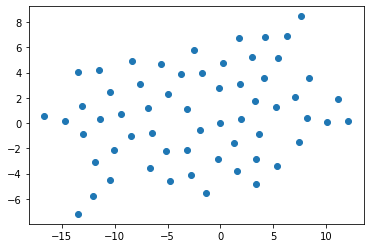

In [14]:
radius = 1.0 * unit.angstroms
n_discs = 60

positions = np.zeros(shape=(n_discs,2),dtype=float) * unit.angstroms

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random() # angulo aleatorio
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center) * unit.angstroms
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

plt.scatter(positions[:,0], positions[:,1])

In [ ]:
np.cos(0.54)

## 3D Alpha Spheres with OpenPocket

Lets define 4 points in space:

In [ ]:
positions = np.zeros(shape=(4,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms

We can obtain the set of alpha spheres defined by the coordinates of those 4 points. With the class `AlphSpheresSet` we can instance an object given an array of 3D coordinates:

In [ ]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

The new object has some useful methods and attributes regarding the resultant alpha-spheres set. Lets check, for instance, the number of alpha spheres obtained with our 4 points:

In [ ]:
alpha_spheres_set.n_alpha_spheres

As expected, there is only one alpha sphere. Lets print out now the center and radius of the first and unique alpha sphere of the set:

In [ ]:
print('The only alpha-sphere has its center in {} and a radius of {} length.'.format(
    alpha_spheres_set.centers[0], alpha_spheres_set.radii[0]))

We can also wonder what points of the input points distribution are in contact with an specific alpha sphere of the set. In this case is trivial, since there is only 4 points and 1 alpha sphere:

In [ ]:
alpha_spheres_set.points_in_surface[0]

At last, lets see the sphere and the 4 points in a spatial representation:

In [ ]:
view = nv.NGLWidget()

for index in range(alpha_spheres_set.n_points):
    atom_coordinates = alpha_spheres_set.points[index,:]._value
    view.shape.add_sphere(list(atom_coordinates), [0.8,0.0,0.0], 0.2)

for index in range(alpha_spheres_set.n_alpha_spheres):
    sphere_coordinates = alpha_spheres_set.centers[index,:]._value
    sphere_radius = alpha_spheres_set.radii[index]._value
    view.shape.add_sphere(list(sphere_coordinates), [0.8,0.8,0.8], sphere_radius)
    
view

As we already knew, 4 points define a single alpha sphere by construction. Lets increase the number of points to 6 to see what happens:

In [ ]:
positions = np.zeros(shape=(6,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms
positions[4,:] = [0.0, 0.0, 0.0] * unit.angstroms
positions[5,:] = [-1.0, -1.0, 0.0] * unit.angstroms

In [ ]:
positions

In [ ]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

In [ ]:
alpha_spheres_set.n_alpha_spheres

Now we have 4 alpha spheres. We can check centers and radii:

In [ ]:
alpha_spheres_set.centers

In [ ]:
alpha_spheres_set.radii

Lets visualize the points and resultant alpha spheres:

In [ ]:
alpha_spheres_set.view()

We can also visualize only a list of alpha sphere indices with their corresponding points in contact

In [ ]:
alpha_spheres_set.view([1,3])

What are the indices of the points shown in the above figure? What are the indices of the points in the surface of alpha spheres 1th and 3th?

In [ ]:
alpha_spheres_set.get_points_in_surfaces([1,3])